In [39]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install opencv-python

In [41]:
pip install matplotlib

In [42]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, hinge_loss, classification_report
from skimage.transform import rotate
from skimage import util
from skimage.util import random_noise

In [48]:
# Define classes and their labels
classes = {'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}

# Define augmentation functions
def augment_data(img):
    # Rotate the image by a random angle between -15 and 15 degrees
    rotated_img = rotate(img, angle=np.random.uniform(-15, 15), mode='edge')
    # Flip the image horizontally with a 50% chance
    flipped_img = util.random_flip(rotated_img, horizontal=True, vertical=False)
    return flipped_img

# Load and preprocess the dataset
X = []
Y = []
for cls, label in classes.items():
    pth = f"C:\\Users\\Syahdika Bobby\\Documents\\filename\\training\\{cls}"
    for filename in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, filename), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img.flatten() / 255.0)  # Flatten and normalize the image data
        Y.append(label)
X = np.array(X)
Y = np.array(Y)

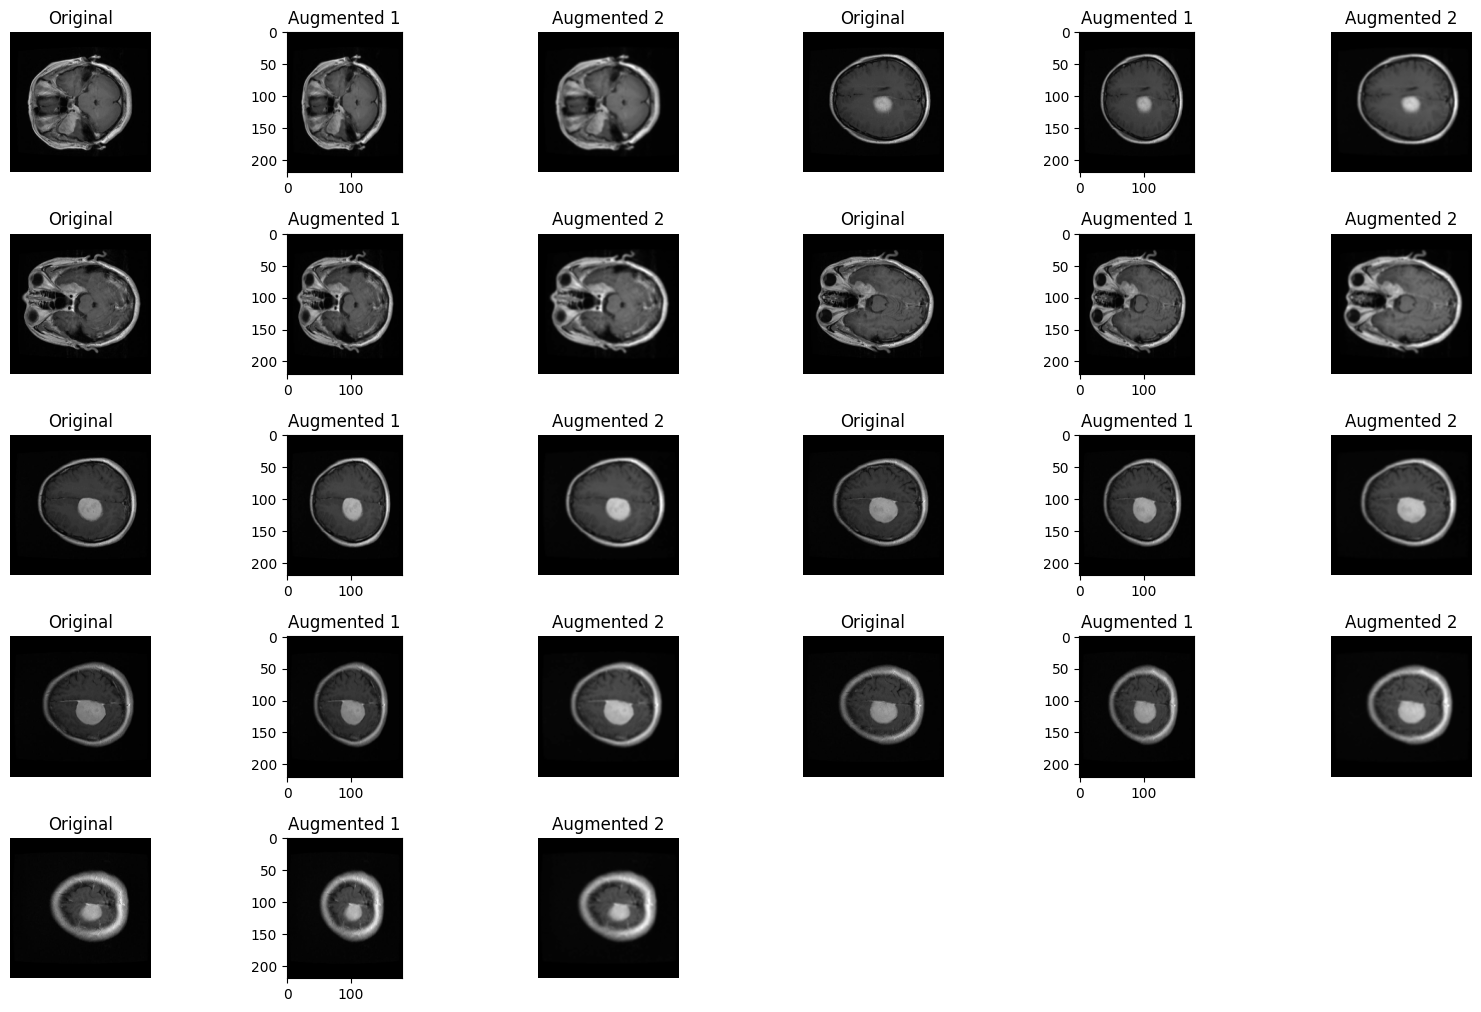

In [49]:
# Define augmentation functions
def augment_data(img):
    # Reshape the image by stretching or compressing it
    reshaped_img = cv2.resize(img, (180, 220))  # Example resizing to (180, 220)
    # Apply Gaussian blur to the image
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # Example Gaussian blur with kernel size (5, 5)
    return reshaped_img, blurred_img

# Load and preprocess the dataset with augmentation
X = []
Y = []
augmented_images1 = []  # Store augmented images for visualization
augmented_images2 = []  # Store augmented images for visualization
for cls, label in classes.items():
    pth = f"C:\\Users\\Syahdika Bobby\\Documents\\filename\\training\\{cls}"
    for filename in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, filename), 0)
        img = cv2.resize(img, (200, 200))
        augmented_img1, augmented_img2 = augment_data(img)
        X.append(img.flatten() / 255.0)  # Flatten and normalize the original image data
        Y.append(label)
        augmented_images1.append(augmented_img1)  # Store augmented images
        augmented_images2.append(augmented_img2)  # Store augmented images
X = np.array(X)
Y = np.array(Y)

# Display original and augmented images
plt.figure(figsize=(16, 12))
for i in range(9):
    plt.subplot(6, 6, 3*i+1)
    plt.imshow(X[i].reshape(200, 200), cmap='gray')  # Original image
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(6, 6, 3*i+2)
    plt.imshow(augmented_images1[i], cmap='gray')  # Augmented image 1
    plt.title("Augmented 1")
    plt.axis('on')

    plt.subplot(6, 6, 3*i+3)
    plt.imshow(augmented_images2[i], cmap='gray')  # Augmented image 2
    plt.title("Augmented 2")
    plt.axis('off')

plt.tight_layout()
plt.show()


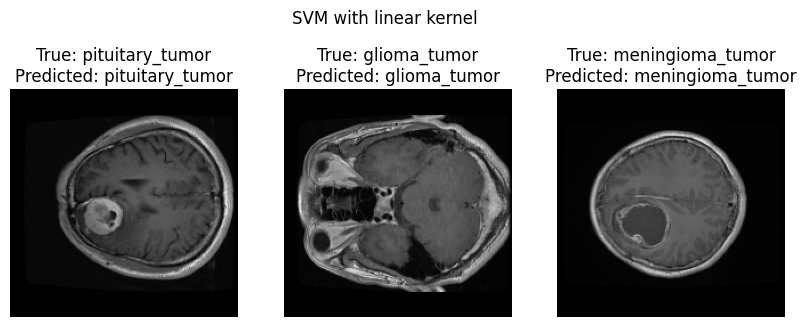

Kernel: linear
Accuracy: 93.33%
Sensitivity (Recall): 1.00
Specificity: 1.00
F1-score: 1.00
Hinge Loss: 0.13%



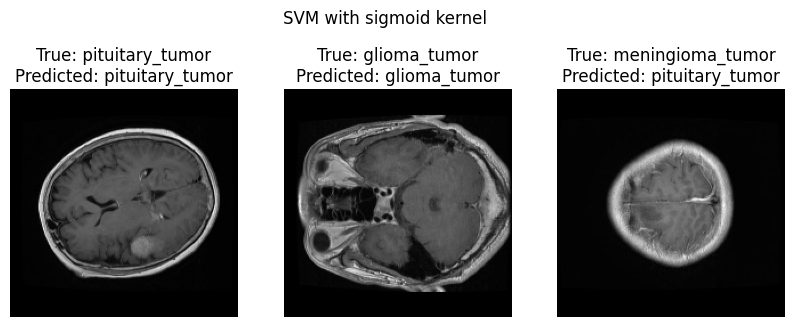

Kernel: sigmoid
Accuracy: 56.67%
Sensitivity (Recall): 0.85
Specificity: 0.85
F1-score: 0.85
Hinge Loss: 1.01%



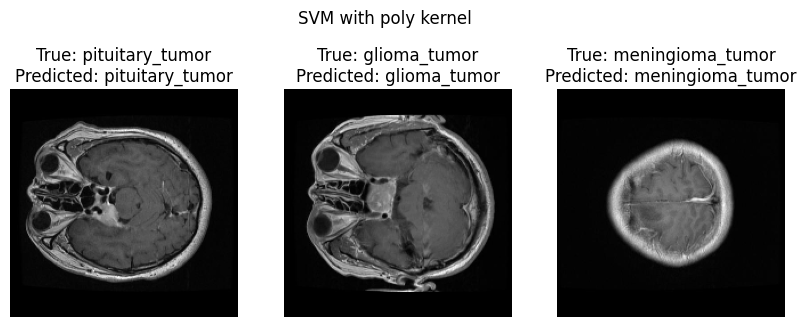

Kernel: poly
Accuracy: 96.67%
Sensitivity (Recall): 1.00
Specificity: 1.00
F1-score: 1.00
Hinge Loss: 0.07%



In [50]:
from sklearn.metrics import hinge_loss

# Train SVM models with different kernels
kernels = ['linear', 'sigmoid', 'poly']
kernel_accuracies = []
kernel_losses = []

for kernel in kernels:
    # Train SVM model
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = svm_model.predict(X_test)
    # Predict decision scores on test set
    decision_scores = svm_model.decision_function(X_test)

    # Compute Hinge Loss
    hinge_loss_value = hinge_loss(y_test, decision_scores)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = 2 * (sensitivity * specificity) / (sensitivity + specificity)
    
    # Calculate Hinge Loss
    hinge = hinge_loss(y_test, svm_model.decision_function(X_test))
    
    # Visualize some samples
    plt.figure(figsize=(10, 4))
    for i, cls_name in enumerate(classes.keys()):
        plt.subplot(1, 3, i+1)
        sample_idx = np.random.choice(np.where(y_test == classes[cls_name])[0])
        sample_img = X_test[sample_idx].reshape(200, 200)
        plt.imshow(sample_img, cmap='gray')
        plt.title(f"True: {cls_name}\nPredicted: {list(classes.keys())[y_pred[sample_idx]-1]}")
        plt.axis('off')
    plt.suptitle(f"SVM with {kernel} kernel")
    plt.show()

    # Display metrics
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Sensitivity (Recall): {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Hinge Loss: {hinge:.2f}%")
    print()



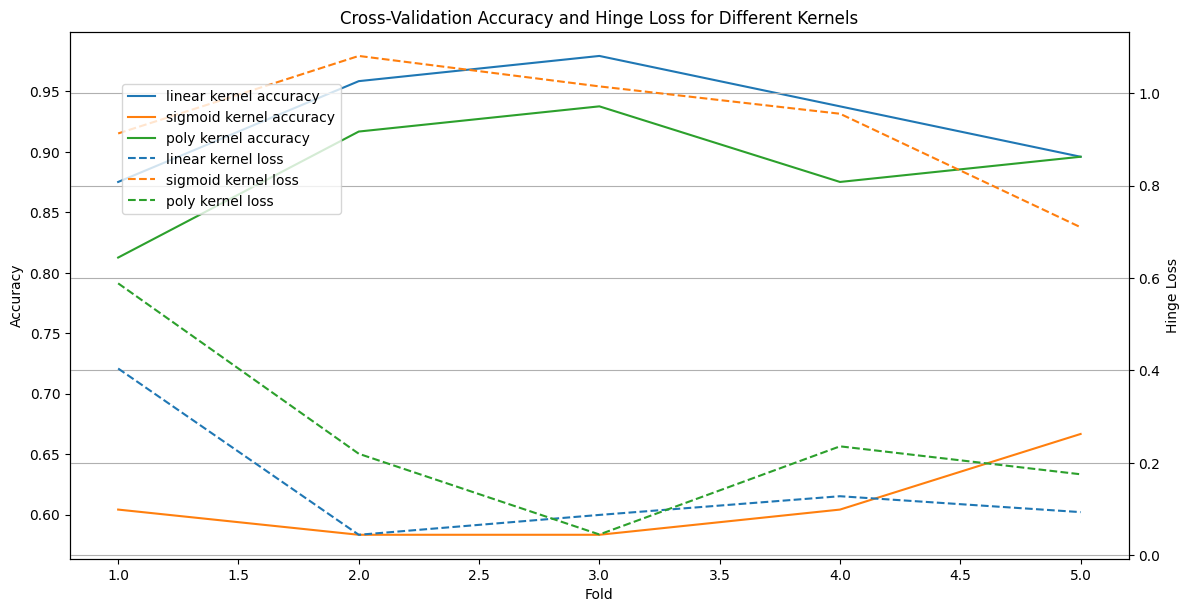

In [51]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train SVM models with different kernels and cross-validation
kernels = ['linear', 'sigmoid', 'poly']
kernel_accuracies = []
kernel_losses = []

# Define colors for each kernel
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, kernel in enumerate(kernels):
    color = colors[i]
    
    # Train SVM model
    svm_model = SVC(kernel=kernel)
    
    # Cross-validation to get both accuracy and loss
    cv_results = cross_validate(svm_model, X_train, y_train, cv=5, scoring=['accuracy'], return_train_score=True)
    kernel_accuracies.append(cv_results['test_accuracy'])
    
    hinge_losses = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X_train):
        X_tr, X_val = X_train[train_index], X_train[test_index]
        y_tr, y_val = y_train[train_index], y_train[test_index]
        svm_model.fit(X_tr, y_tr)
        y_val_pred = svm_model.decision_function(X_val)
        hinge_losses.append(hinge_loss(y_val, y_val_pred))
    kernel_losses.append(hinge_losses)
    
    # Train the model on the full training set
    svm_model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Plot accuracy and loss for each kernel
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Fold')
ax1.set_ylabel('Accuracy')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Hinge Loss')

# Plotting accuracy
for i, kernel in enumerate(kernels):
    ax1.plot(range(1, 6), kernel_accuracies[i], label=f'{kernel} kernel accuracy', color=colors[i])
    
# Plotting hinge loss
for i, kernel in enumerate(kernels):
    ax2.plot(range(1, 6), kernel_losses[i], label=f'{kernel} kernel loss', linestyle='dashed', color=colors[i])

fig.tight_layout()
plt.title('Cross-Validation Accuracy and Hinge Loss for Different Kernels')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()

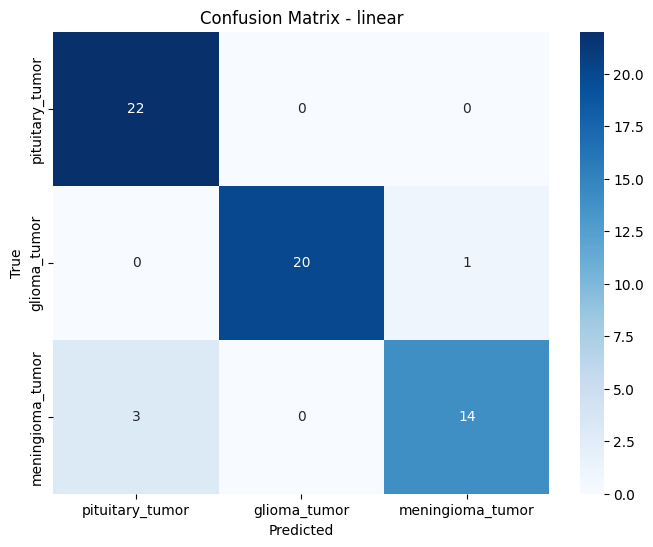

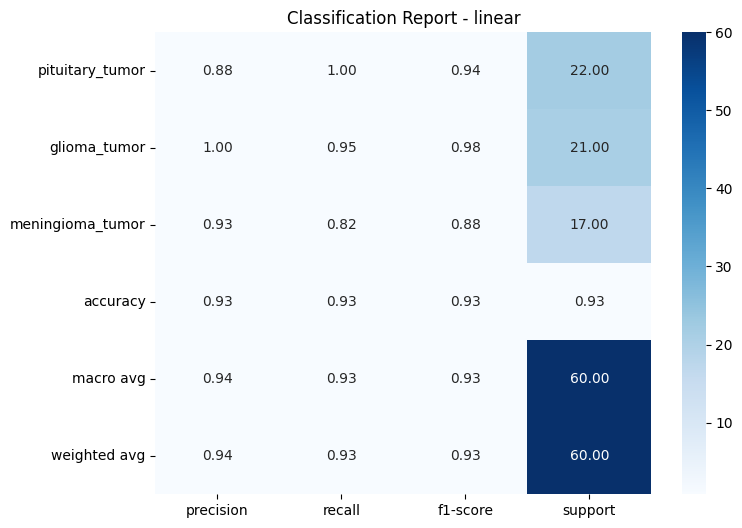

Kernel: linear
Accuracy: 93.33%



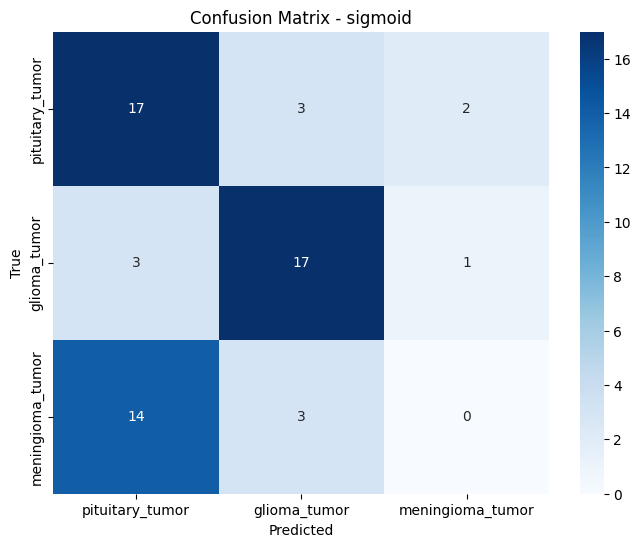

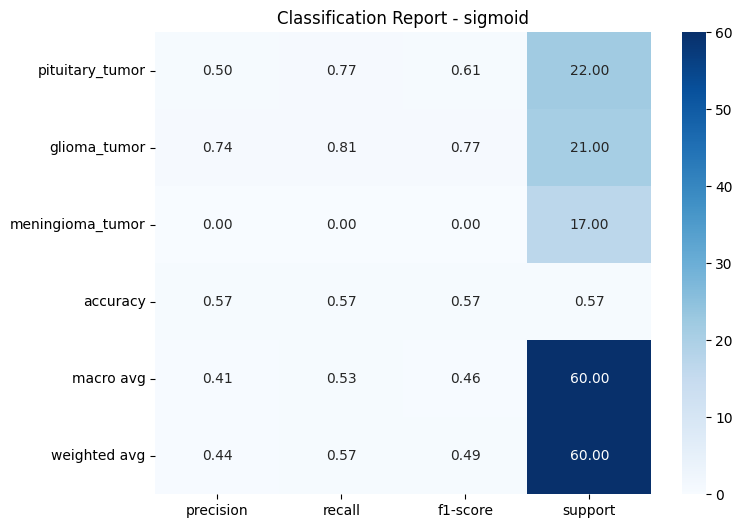

Kernel: sigmoid
Accuracy: 56.67%



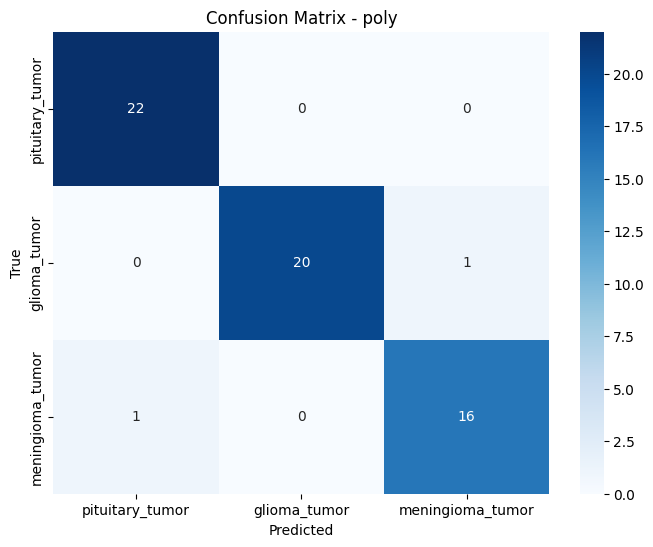

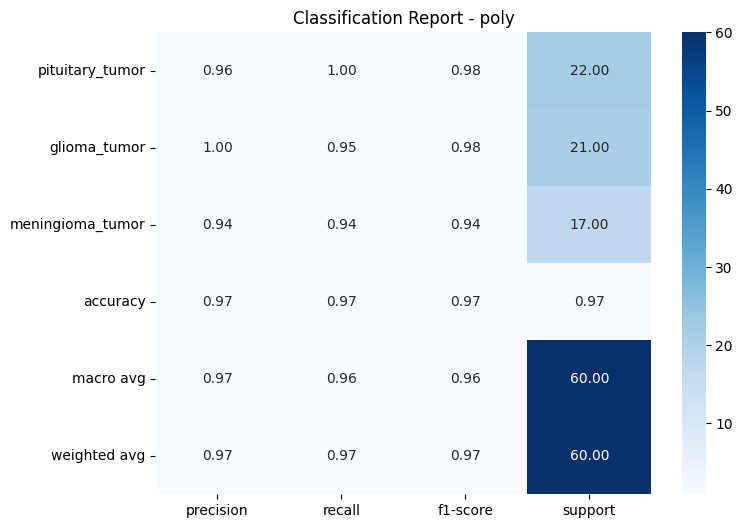

Kernel: poly
Accuracy: 96.67%



In [52]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to plot classification report
def plot_classification_report(cr, title='Classification Report'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cr, annot=True, cmap='Blues', fmt='.2f')
    plt.title(title)
    plt.show()

# List to store accuracies for each kernel
accuracies = []

kernels = ['linear', 'sigmoid', 'poly']

for kernel in kernels:
    # Train SVM model
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Classification report
    report = classification_report(y_test, y_pred, target_names=list(classes.keys()), output_dict=True)
    
    # Convert classification report to DataFrame for better visualization
    report_df = pd.DataFrame(report).transpose()
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=list(classes.keys()), title=f'Confusion Matrix - {kernel}')
    
    # Plot classification report
    plot_classification_report(report_df, title=f'Classification Report - {kernel}')
    
    # Display metrics
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print()
